## Machine Learning, Cluster - Bike Sales in Europe

#### 1. Importing libraries and data frame
#### 2. The elbow technique
#### 3. k-means clustering

## 1. Importing libraries and data frame

In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
%matplotlib inline

In [2]:
# Define path

path = r'/Users/eriseldabaci/Desktop/CareerFoundry/Advanced Analytics & Dashboard Design/Bikes Sales in Europe'

path

'/Users/eriseldabaci/Desktop/CareerFoundry/Advanced Analytics & Dashboard Design/Bikes Sales in Europe'

In [3]:
df = pd.read_csv(os.path.join(path,'02 Data','Prepare Data', 'bike_sales.csv'),index_col=0)

In [4]:
df.shape

(112036, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112036 entries, 0 to 113035
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Day               112036 non-null  int64 
 1   Month             112036 non-null  object
 2   Year              112036 non-null  int64 
 3   Customer_Age      112036 non-null  int64 
 4   Age_Group         112036 non-null  object
 5   Customer_Gender   112036 non-null  object
 6   Country           112036 non-null  object
 7   State             112036 non-null  object
 8   Product_Category  112036 non-null  object
 9   Sub_Category      112036 non-null  object
 10  Product           112036 non-null  object
 11  Order_Quantity    112036 non-null  int64 
 12  Unit_Cost         112036 non-null  int64 
 13  Unit_Price        112036 non-null  int64 
 14  Profit            112036 non-null  int64 
 15  Cost              112036 non-null  int64 
 16  Revenue           112036 non-null  int

In [6]:
df.dtypes

Day                  int64
Month               object
Year                 int64
Customer_Age         int64
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Order_Quantity       int64
Unit_Cost            int64
Unit_Price           int64
Profit               int64
Cost                 int64
Revenue              int64
dtype: object

 ### Correlation HeatMap

In [7]:
# Create sub for to pick out variable

sub = df[['Customer_Age','Order_Quantity','Unit_Cost','Unit_Price','Profit','Cost','Revenue']]

# Chek the output

sub

,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,19,8,45,120,590,360,960
1,19,8,45,120,590,360,960
2,49,23,45,120,1366,1035,2760
3,49,20,45,120,1188,900,2400
4,47,4,45,120,238,180,480
...,...,...,...,...,...,...,...
113031,41,3,24,64,112,72,192
113032,18,22,24,64,655,528,1408
113033,18,22,24,64,655,528,1408
113034,37,24,24,64,684,576,1536


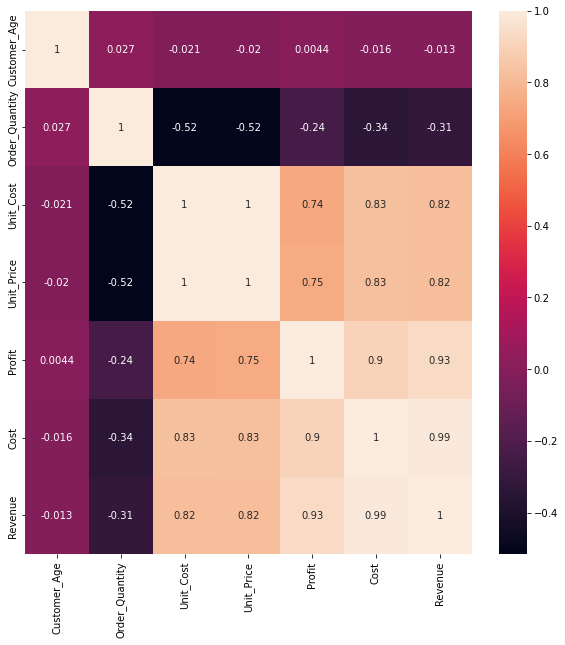

In [8]:
# Create a subplot with matplotlib

f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

## 2. The elbow technique

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-482632110737.0956,
 -155241618049.12732,
 -80553657210.93065,
 -62409170954.96447,
 -45583539532.74282,
 -35675241805.279526,
 -27521977897.523796,
 -22567830149.524143,
 -18013489457.37433]

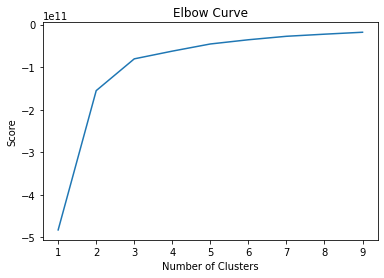

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show() # Then rises only slightly after 5 and the noptimal count for cluster is 5.

#### Note: Based on breakdown the number of cluster will be 3. 

In [12]:
# Create the k-means object

kmeans = KMeans(n_clusters = 3) 

In [13]:
# Fit the K-means object to the data
kmeans.fit(sub)

KMeans(n_clusters=3)

In [16]:
sub['clusters'] = kmeans.fit_predict(sub)

sub

/var/folders/0x/gf5nsq01679_pzl997xhrwfh0000gp/T/ipykernel_33772/1482735438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,clusters
0,19,8,45,120,590,360,960,0
1,19,8,45,120,590,360,960,0
2,49,23,45,120,1366,1035,2760,1
3,49,20,45,120,1188,900,2400,0
4,47,4,45,120,238,180,480,0
...,...,...,...,...,...,...,...,...
113031,41,3,24,64,112,72,192,0
113032,18,22,24,64,655,528,1408,0
113033,18,22,24,64,655,528,1408,0
113034,37,24,24,64,684,576,1536,0


In [21]:
# Get the cluster labels
labels = kmeans.labels_

In [22]:
df['Cluster'] = labels

In [17]:
sub['clusters'].value_counts()

0    94744
1    15047
2     2245
Name: clusters, dtype: int64

Text(0, 0.5, 'Profit')

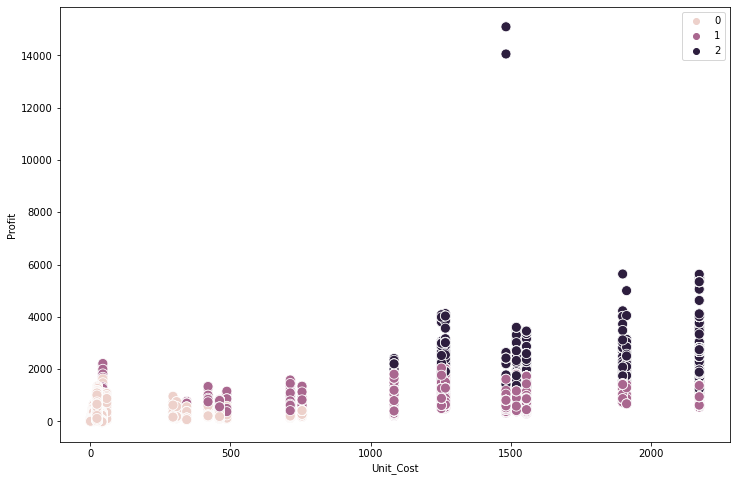

In [18]:
#Plot the clusters for the "cleanliness_rating" and "satisfaction_rating" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['Unit_Cost'], y=sub['Profit'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Unit_Cost') # Label x-axis.
plt.ylabel('Profit') # Label y-axis.


In [19]:
sub.loc[sub['clusters'] == 2, 'cluster'] = 'darkpurple'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'lightpink'

/var/folders/0x/gf5nsq01679_pzl997xhrwfh0000gp/T/ipykernel_33772/536329239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[sub['clusters'] == 2, 'cluster'] = 'darkpurple'


##### Note: The result shows that the data has been divided into three clusters, labeled 0, 1, and 2, based on the similarity of the values for Unit Cost and Profit across different data points. This information can be used to inform business decisions, such as product pricing or cost reduction strategies, by identifying which product lines or business segments are most profitable and which ones may need to be re-evaluated or optimized. Additionally, the company can use this information to identify areas where it may be able to increase profits by reducing costs, improving efficiencies, or developing new product offerings.

In [20]:
sub.groupby('cluster').agg({'Unit_Price':['mean', 'median', 'count'], 
                         'Profit':['mean', 'median','count'], 
                         'Unit_Cost':['mean', 'median','count'],
                          'Revenue':['mean', 'median','count'],
                          'Cost':['mean', 'median','count']})

Unit_Price                      Profit                 \
                   mean  median  count         mean  median  count   
cluster                                                              
darkpurple  2966.692650  3375.0   2245  2366.324722  2322.0   2245   
lightpink     87.986849    10.0  94744   145.286329    68.0  94744   
purple      2382.611683  2320.0  15047   861.888217   807.0  15047   

              Unit_Cost                     Revenue                 \
                   mean  median  count         mean  median  count   
cluster                                                              
darkpurple  1767.133630  1898.0   2245  8007.291759  7156.0   2245   
lightpink     50.866240     7.0  94744   351.979281   150.0  94744   
purple      1410.178175  1266.0  15047  2881.922842  2384.0  15047   

                   Cost                 
                   mean  median  count  
cluster                                 
darkpurple  4762.990200  4342.0   2245  
lightpink    172.632251    63.0  94744  
purple      1710.091713  1482.0  15047

In [ ]:
data.to_csv('labeled_data.csv', index=False)

In [23]:
## Export Data frame CSV file.

df.to_csv(os.path.join(path,'02 Data','Prepare Data', 'labeled_data.csv'))

In [24]:
df.head()

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Cluster
0,26,November,2013,19,Youth (<25),Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,960,0
1,26,November,2015,19,Youth (<25),Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,960,0
2,23,March,2014,49,Adults (35-64),Male,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2760,1
3,23,March,2016,49,Adults (35-64),Male,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2400,0
4,15,May,2014,47,Adults (35-64),Female,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,480,0
